### Importing Libraries and Loading the Dataset

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
from skimpy import skim  # Used for quick summarization and inspection of data
import missingno as msno  # Used for visualizing and analyzing missing data

In [2]:
# Loading & Reading dataset
df_original = pd.read_csv("imdb_movie_dataset.csv", index_col="Title")

# Making a copy
df = df_original.copy()

In [3]:
# Checking the dataset
df.sample(5)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
The Road,756,"Adventure,Drama","In a dangerous post-apocalyptic world, an aili...",John Hillcoat,"Viggo Mortensen, Charlize Theron, Kodi Smit-Mc...",2009,111,7.3,187302,0.06,NaN
Vincent N Roxxy,308,"Crime,Drama,Thriller",A small town loner and a rebellious punk rocke...,Gary Michael Schultz,"Emile Hirsch, Zoë Kravitz, Zoey Deutch,Emory C...",2016,110,5.5,403,NaN,NaN
Money Monster,570,"Crime,Drama,Thriller",Financial TV host Lee Gates and his producer P...,Jodie Foster,"George Clooney, Julia Roberts, Jack O'Connell,...",2016,98,6.5,68654,41.01,55.0
The Autopsy of Jane Doe,62,"Horror,Mystery,Thriller","A father and son, both coroners, are pulled in...",André Øvredal,"Brian Cox, Emile Hirsch, Ophelia Lovibond, Mic...",2016,86,6.8,35870,NaN,65.0
The Escort,628,"Comedy,Drama,Romance","Desperate for a good story, a sex-addicted jou...",Will Slocombe,"Lyndsy Fonseca, Michael Doneger, Tommy Dewey,B...",2016,88,6.0,7181,NaN,46.0


### Initial Exploration and Analyzing Values

In [4]:
# Dataset Initial Summary by Skimpy Library
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1000   │ │ int64       │ 4     │                                                          │
│ │ Number of columns │ 11     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA   ┃ NA %  ┃ mean    ┃ sd     ┃ p0   ┃ p25   ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Rank                 │    0 │     0 │   500.5 │  288.8 │    1 │ 250.8 │  500.5 │  750.2 │    1000 │ ▇▇▇▇▇▇ │  │
│ │ Year                 │    0 │     0 │    2013 │  3.206 │ 2006 │  2010 │   2014 │   2016 │    2016 │ ▂▂▁▂▃▇ │  │
│ │ Runtime (Minutes)    │    0 │     0 │   113.2 │  18.81 │   66 │   100 │    111 │    123 │     191 │ ▁▇▇▃▁  │  │
│ │ Rating               │    0 │     0 │   6.723 │ 0.9454 │  1.9 │   6.2 │    6.8 │    7.4 │       9 │   ▁▆▇▂ │  │
│ │ Votes                │    0 │     0 │  169800 │ 188800 │   61 │ 36310 │ 110800 │ 239900 │ 1792000 │   ▇▂   │  │
│ │ Revenue (Millions)   │  128 │  12.8 │   82.96 │  103.3 │    0 │ 13.27 │  47.98 │  113.7 │   936.6 │   ▇▁   │  │
│ │ Metascore            │   64 │   6.4 │   58.99 │  17.19 │   11 │    47 │   59.5 │     72 │     100 │ ▁▃▆▇▆▁ │  │
│ └──────────────────────┴──────┴───────┴─────────┴────────┴──────┴───────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Genre                     │       0 │          0 │                            1 │                     1000 │  │
│ │ Description               │       0 │          0 │                           28 │                    27921 │  │
│ │ Director                  │       0 │          0 │                          2.1 │                     2092 │  │
│ │ Actors                    │       0 │          0 │                          7.9 │                     7860 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 126.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,1000.0,500.500000,288.819436,1.0,250.75,500.500,750.250,1000.00
Year,1000.0,2012.783000,3.205962,2006.0,2010.00,2014.000,2016.000,2016.00
Runtime (Minutes),1000.0,113.172000,18.810908,66.0,100.00,111.000,123.000,191.00
Rating,1000.0,6.723200,0.945429,1.9,6.20,6.800,7.400,9.00
Votes,1000.0,169808.255000,188762.647518,61.0,36309.00,110799.000,239909.750,1791916.00
Revenue (Millions),872.0,82.956376,103.253540,0.0,13.27,47.985,113.715,936.63
Metascore,936.0,58.985043,17.194757,11.0,47.00,59.500,72.000,100.00


In [7]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [8]:
df.describe(include = "object").T

,count,unique,top,freq
Genre,1000,207,"Action,Adventure,Sci-Fi",50
Description,1000,1000,A stuffy businessman finds himself trapped ins...,1
Director,1000,644,Ridley Scott,8
Actors,1000,996,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2


In [9]:
# Viewing Null, Uniquue and Duplicated Values

pd.DataFrame({
                'Count':df.shape[0],
                'Column':df.shape[1],
                'Size':df.size,
                'Null':df.isnull().sum(),
                'Null %':df.isnull().mean() * 100,
                'Not-Null':df.notnull().sum(),
                'Unique':df.nunique(),
                'Duplicated':df.duplicated().sum()
})

,Count,Column,Size,Null,Null %,Not-Null,Unique,Duplicated
Rank,1000,11,11000,0,0.0,1000,1000,0
Genre,1000,11,11000,0,0.0,1000,207,0
Description,1000,11,11000,0,0.0,1000,1000,0
Director,1000,11,11000,0,0.0,1000,644,0
Actors,1000,11,11000,0,0.0,1000,996,0
Year,1000,11,11000,0,0.0,1000,11,0
Runtime (Minutes),1000,11,11000,0,0.0,1000,94,0
Rating,1000,11,11000,0,0.0,1000,55,0
Votes,1000,11,11000,0,0.0,1000,997,0
Revenue (Millions),1000,11,11000,128,12.8,872,814,0


### Organizing and Manipulating Data

In [10]:
# Viewing column names with List Comprehension
[i for i in df.columns]

['Rank',
 'Genre',
 'Description',
 'Director',
 'Actors',
 'Year',
 'Runtime (Minutes)',
 'Rating',
 'Votes',
 'Revenue (Millions)',
 'Metascore']

In [11]:
# Method 1

df.columns = [  'rank',
                'genre',
                'description',
                'director',
                'actors',
                'year',
                'runtime',
                'rating',
                'votes',
                'revenue',
                'metascore'     ]

[i for i in df.columns]

['rank',
 'genre',
 'description',
 'director',
 'actors',
 'year',
 'runtime',
 'rating',
 'votes',
 'revenue',
 'metascore']

In [12]:
# Method 2

df.columns = [col.lower() for col in df]
[i for i in df.columns]

['rank',
 'genre',
 'description',
 'director',
 'actors',
 'year',
 'runtime',
 'rating',
 'votes',
 'revenue',
 'metascore']

In [13]:
# Null Values in Columns
df.isnull().sum()

rank             0
genre            0
description      0
director         0
actors           0
year             0
runtime          0
rating           0
votes            0
revenue        128
metascore       64
dtype: int64

In [14]:
# Total of null values in columns
print(f'Total of Null Values in Columns: {df.isnull().sum().sum()}')

Total of Null Values in Columns: 192


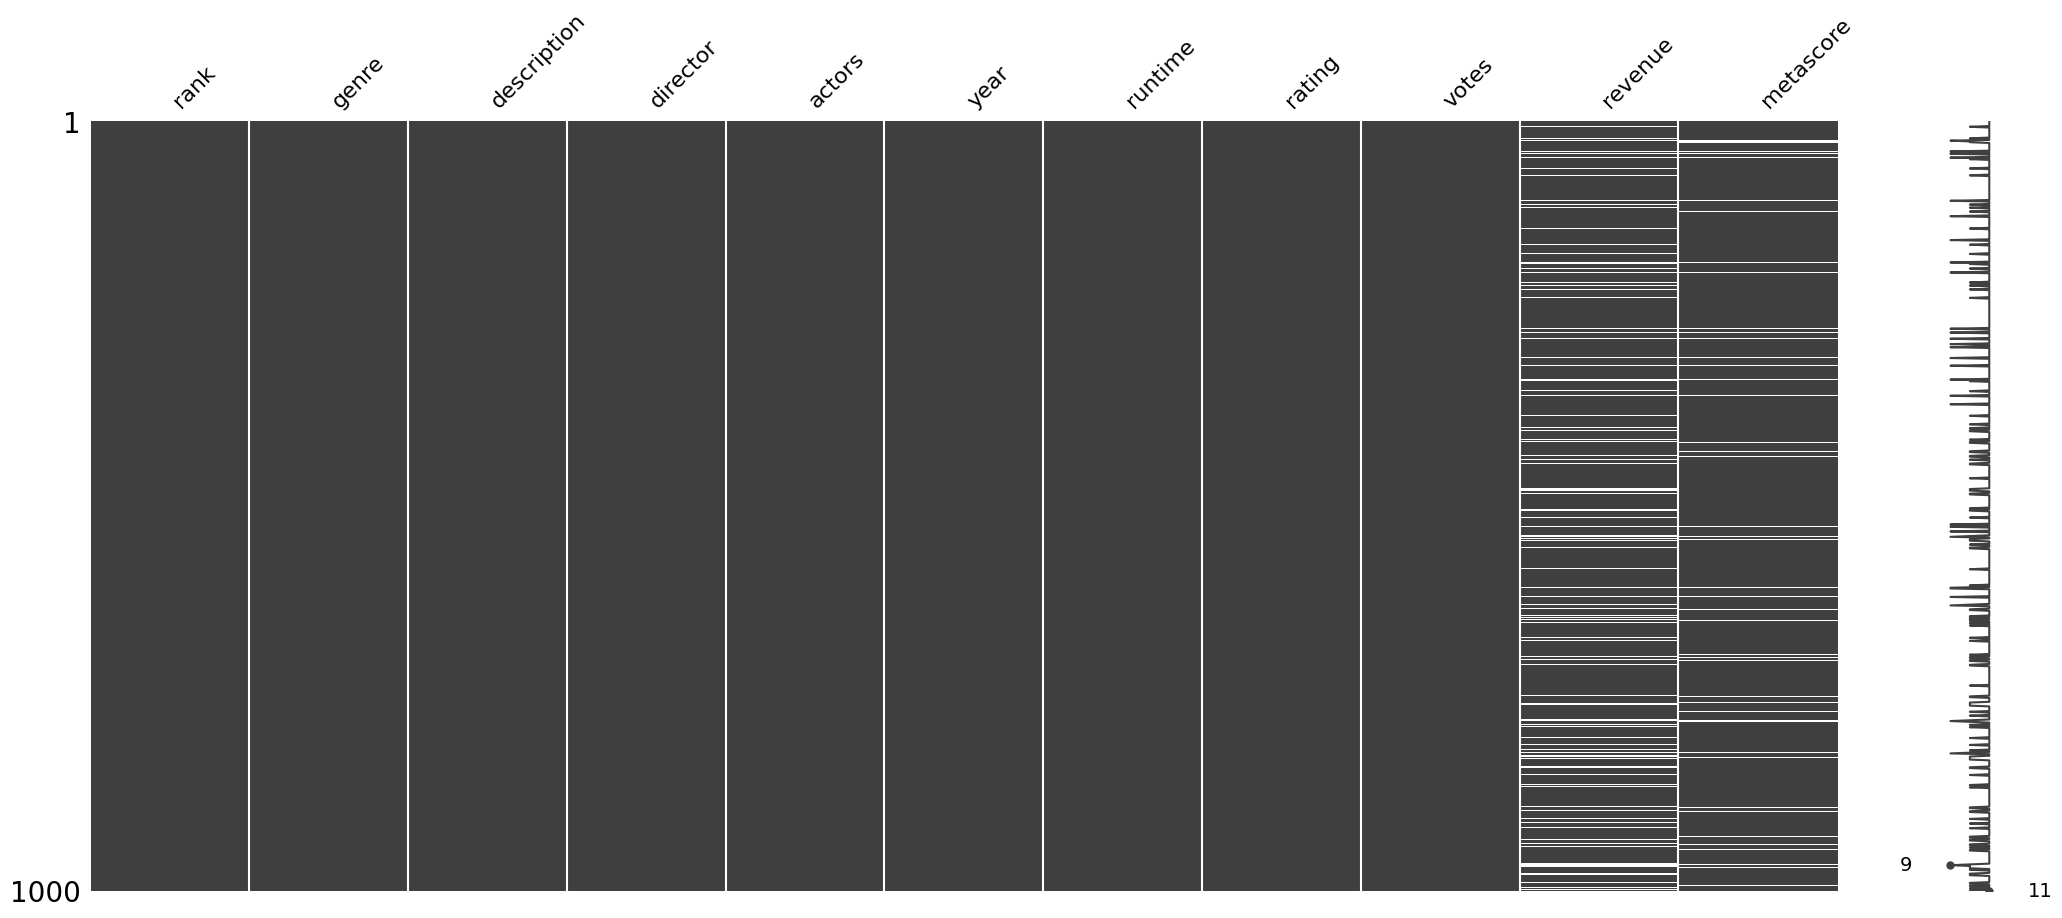

In [15]:
msno.matrix(df);

In [16]:
# Column with a most Null value is revenue
df.isnull().sum()

rank             0
genre            0
description      0
director         0
actors           0
year             0
runtime          0
rating           0
votes            0
revenue        128
metascore       64
dtype: int64

In [17]:
df.revenue.sample(5)

Title
All We Had              NaN
Turbo Kid              0.05
Dallas Buyers Club    27.30
Unknown               61.09
Marie Antoinette      15.96
Name: revenue, dtype: float64

In [18]:
print(f"Revenue mean: {df.revenue.mean()}\nRevenue median: {df.revenue.median()}")

Revenue mean: 82.95637614678898
Revenue median: 47.985


In [19]:
# Fill Null values with median
df.revenue.fillna(df.revenue.median(), inplace=True)

/tmp/ipykernel_718/2593267601.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.revenue.fillna(df.revenue.median(), inplace=True)
